In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
years_range = range(1880, 2019)

In [4]:
pieces = []
columns = ['name', 'sex', 'number']

In [5]:
for year in years_range:
    path = 'USbabyname' + os.sep + 'yob%d.txt' % year
    temp_data = pd.read_csv(path, names=columns)
    
    temp_data['year'] = year
    
    pieces.append(temp_data)

In [6]:
names = pd.concat(pieces, ignore_index=True)  #问题，pd.concat如何把list变成dataFrame形式？

In [7]:
names

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [8]:
total_births = names.pivot_table(values='number', index='year', columns='sex', aggfunc=sum)

In [9]:
%matplotlib inline

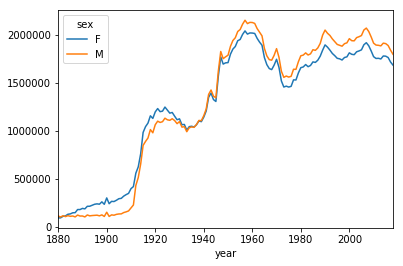

In [10]:
total_births.plot()

In [11]:
total_births.tail()

sex,F,M
year,,
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585
2017,1719138,1842837
2018,1686961,1800392


In [12]:
def add_prop(group):
    group['prop'] = group.number / group.number.sum()
    return group

In [13]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [14]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
2011  F      1.0
      M      1.0
2012  F      1.0
      M      1.0
2013  F      1.0
      M      1.0
2014  F      1.0
      M      1.0
2015  F      1.0
      M      1.0
2016  F      1.0
      M      1.0
2017  F      1.0
    

In [15]:
def get_top1000(group):
    return group.sort_values(by='number', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [16]:
top1000.reset_index(inplace=True, drop=True)

In [17]:
top1000

,name,sex,number,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


### 分析命名趋势

In [18]:
# top1000按性别分类
boys = top1000[top1000.sex == 'M']
grils = top1000[top1000.sex == 'F']

In [24]:
# year和name的数据透视表
total_nums = top1000.pivot_table(values='number', index='year', columns='name', aggfunc=sum)

In [28]:
total_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


In [30]:
# 随机几个名字的折线图
subset = total_nums[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF2FABB630>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001EF3072C358>], dtype=object)

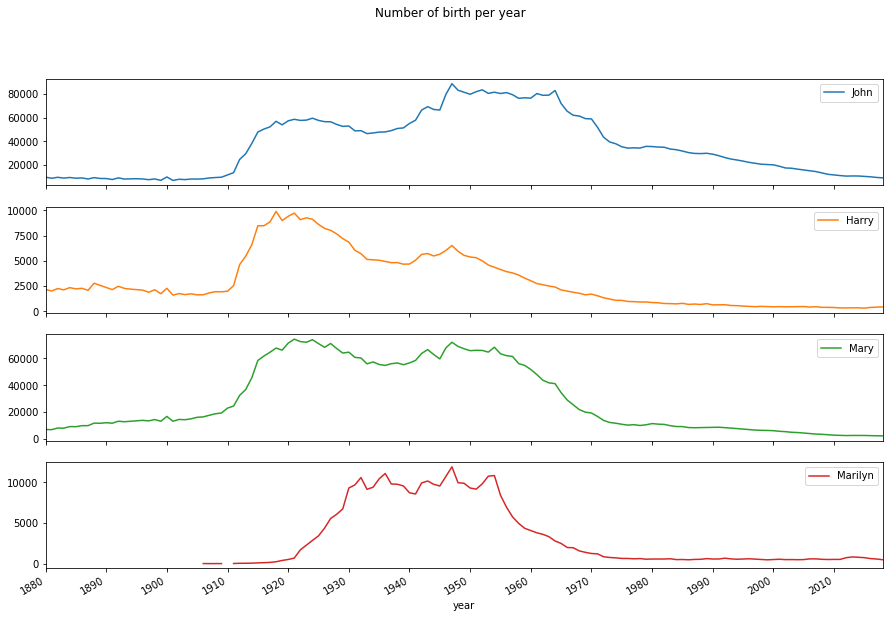

In [36]:
subset.plot(subplots=True, figsize=(15, 10), grid=False, title='Number of birth per year', xticks=range(1880, 2020, 10))

- 可以看出这几个名字在近些年不受欢迎了，可能就和咱们的“花”，“秀”差不多
- 原因假设：
  - 父母越来不愿意起随大流的名字

- test假设：看top1000流行名字所占比列

In [38]:
tabel = top1000.pivot_table(values='prop', index='year', columns='sex', aggfunc=sum)

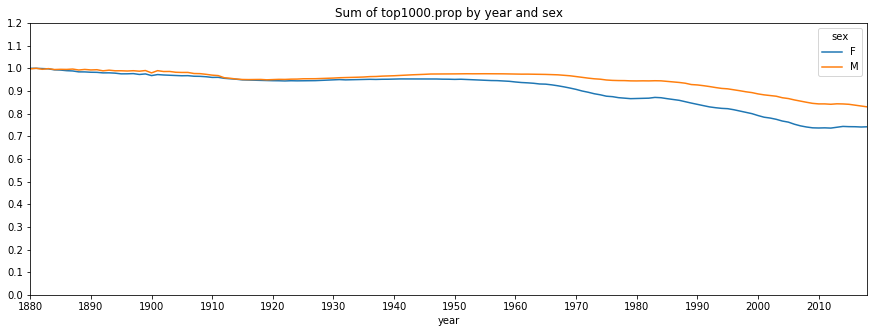

In [44]:
tabel.plot(title='Sum of top1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10), figsize=(15, 5))

可以看出，大家逐渐不喜欢用岁大流的名字了。

- test假设：计算总人口前50%不同人口的数量

In [45]:
# 首先对‘prop’做降序
# 再对‘prop’做cumsum()，利用searchsorted函数，发现50%的位置
# 返回值越大，说明更多的名字构成了总人口的50%，即；名字更多样
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(0.5)

In [53]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [57]:
diversity = diversity.unstack('sex')

In [58]:
diversity.head()

sex,F,M
year,,
1880,37,13
1881,37,13
1882,37,14
1883,38,14
1884,38,15


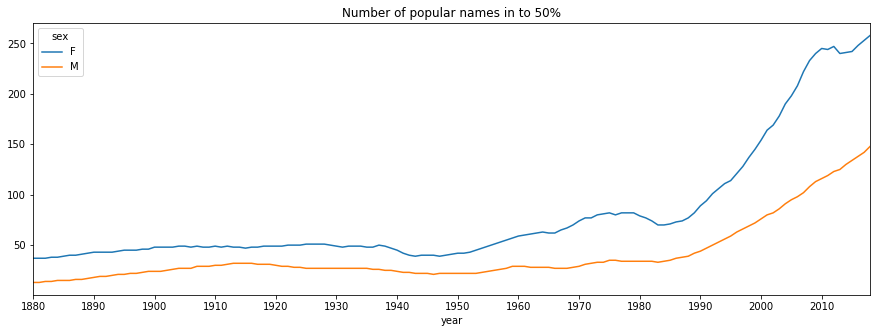

In [66]:
diversity.plot(title='Number of popular names in to 50%', figsize=(15, 5), xticks=range(1880, 2020, 10))

- 可以看出，名字越来越多样
- 女孩的多样高于男孩，且查阅加大